<a href="https://colab.research.google.com/github/MarianoNaveyra/DataScience/blob/main/Proyecto_Partell_Naveyra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Abstract:

Este análisis busca detectar los factores claves que influyen en el resultado de un partido de fútbol, tomando como ejemplo la liga inglesa de futbol. Este dataset contiene información detallada sobre partidos de equipos locales y visitantes. Se tienen en cuenta variables como goles, tiros al arco, tarjetas, y faltas para identificar patrones que puedan explicar las diferencias en el rendimiento entre equipos locales y visitantes, así como la relación entre acciones específicas del juego y el resultado final del partido.

EL objetivo de este proyecto es a partir de los datos que ya tenemos, poder predecir el  resultado de un partido de la liga inglesa, pierde, gana o empata el equipo local.

Hipótesis:

Los equipos locales tienen más probabilidades de ganar que los equipos visitantes.

La cantidad de tiros al arco está directamente relacionada con el número de goles.


Los equipos visitantes cometen más faltas y reciben más tarjetas que los equipos locales.

Los equipos que terminan el primer tiempo arriba el el marcador, tienen mas chances de ganar el partido.

Preguntas:
¿Los equipos que vienen mejor en la actual temporada tienen mas probabilidad de ganar partidos?

¿Cuáles son los factores clave que determinan la victoria de un equipo?

¿Los goles al medio tiempo influyen significativamente en el resultado final del partido?

¿Existen diferencias significativas en el rendimiento de los equipos locales y visitantes?

¿Existe una relación significativa entre los disparos a puerta y los goles marcados?

¿Los equipos locales cometen mas faltas y obtienen menos amarillas que los equivos visitantes?

In [2]:

url = 'https://raw.githubusercontent.com/MarianoNaveyra/DataScience/main/DatasetFutbol.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')
df.head()



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [3]:
columnas_significado = {
    "Season": "Temporada del partido",
    "DateTime": "Fecha y hora del partido (aaaa-mm-dd hh:mm:ss)",
    "HomeTeam": "Equipo local",
    "AwayTeam": "Equipo visitante",
    "FTHG": "Goles del equipo local al final del partido",
    "FTAG": "Goles del equipo visitante al final del partido",
    "FTR": "Resultado final (H=Victoria local, D=Empate, A=Victoria visitante)",
    "HTHG": "Goles del equipo local al medio tiempo",
    "HTAG": "Goles del equipo visitante al medio tiempo",
    "HTR": "Resultado al medio tiempo (H=Victoria local, D=Empate, A=Victoria visitante)",
    "Referee": "Árbitro del partido",
    "HS": "Tiros del equipo local",
    "AS": "Tiros del equipo visitante",
    "HST": "Tiros a puerta del equipo local",
    "AST": "Tiros a puerta del equipo visitante",
    "HC": "Saques de esquina del equipo local",
    "AC": "Saques de esquina del equipo visitante",
    "HF": "Faltas cometidas por el equipo local",
    "AF": "Faltas cometidas por el equipo visitante",
    "HY": "Tarjetas amarillas del equipo local",
    "AY": "Tarjetas amarillas del equipo visitante",
    "HR": "Tarjetas rojas del equipo local",
    "AR": "Tarjetas rojas del equipo visitante"
}

print("Columna".ljust(15) + "| Significado")
print("-" * 50)
for columna, significado in columnas_significado.items():
    print(f"{columna.ljust(15)}| {significado}")


Columna        | Significado
--------------------------------------------------
Season         | Temporada del partido
DateTime       | Fecha y hora del partido (aaaa-mm-dd hh:mm:ss)
HomeTeam       | Equipo local
AwayTeam       | Equipo visitante
FTHG           | Goles del equipo local al final del partido
FTAG           | Goles del equipo visitante al final del partido
FTR            | Resultado final (H=Victoria local, D=Empate, A=Victoria visitante)
HTHG           | Goles del equipo local al medio tiempo
HTAG           | Goles del equipo visitante al medio tiempo
HTR            | Resultado al medio tiempo (H=Victoria local, D=Empate, A=Victoria visitante)
Referee        | Árbitro del partido
HS             | Tiros del equipo local
AS             | Tiros del equipo visitante
HST            | Tiros a puerta del equipo local
AST            | Tiros a puerta del equipo visitante
HC             | Saques de esquina del equipo local
AC             | Saques de esquina del equipo visitante
HF

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8289 entries, 0 to 8288
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    8289 non-null   object 
 1   DateTime  8078 non-null   object 
 2   HomeTeam  8078 non-null   object 
 3   AwayTeam  8078 non-null   object 
 4   FTHG      8078 non-null   float64
 5   FTAG      8078 non-null   float64
 6   FTR       8078 non-null   object 
 7   HTHG      8078 non-null   float64
 8   HTAG      8078 non-null   float64
 9   HTR       8078 non-null   object 
 10  Referee   8078 non-null   object 
 11  HS        8078 non-null   float64
 12  AS        8078 non-null   float64
 13  HST       8078 non-null   float64
 14  AST       8078 non-null   float64
 15  HC        8078 non-null   float64
 16  AC        8078 non-null   float64
 17  HF        8078 non-null   float64
 18  AF        8078 non-null   float64
 19  HY        8078 non-null   float64
 20  AY        8078 non-null   floa

In [5]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000
mean,1.519064,1.155113,0.679995,0.505818,13.543204,10.692622,6.130478,4.781505,6.075514,4.785467,11.355781,11.840555,1.422506,1.748576,0.063011,0.089626
std,1.298973,1.143241,0.830711,0.722584,5.279937,4.594297,3.342681,2.801628,3.096643,2.731545,3.772690,3.941610,1.192658,1.268779,0.253471,0.297967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [6]:
columns_to_check = ['Season', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR']


df_cleaned = df.dropna(subset=columns_to_check)


invalid_values = df[columns_to_check].isna().sum()
print("Valores nulos eliminados por columna:")
print(invalid_values)


Valores nulos eliminados por columna:
Season        0
HomeTeam    211
AwayTeam    211
FTR         211
HTR         211
dtype: int64


In [7]:
df_cleaned = df.dropna(subset=['Season','HomeTeam','AwayTeam', 'FTR', 'HTR'])


In [8]:
  df_cleaned = df_cleaned.drop(columns=['DateTime', 'Referee'])

In [9]:
mediana_HF = df['HF'].median()
mediana_AF = df['AF'].median()

df['HF'] = df['HF'].replace(0, mediana_HF)
df['AF'] = df['AF'].replace(0, mediana_AF)

print(df[['HF', 'AF']].head())


     HF    AF
0  13.0  12.0
1  19.0  14.0
2  15.0  21.0
3  11.0  13.0
4  21.0  20.0


In [10]:
def find_outliers_IQR(df):
    outlier_indices = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices[column] = outliers.index.tolist()
    return outlier_indices

outliers_dict = find_outliers_IQR(df)
print("Outliers encontrados en todas las columnas:")
for column, indices in outliers_dict.items():
    print(f"{column}: {indices}")


Outliers encontrados en todas las columnas:
FTHG: [0, 1, 15, 19, 30, 69, 72, 91, 99, 104, 111, 126, 128, 159, 162, 163, 185, 189, 197, 213, 214, 220, 225, 273, 324, 334, 360, 367, 396, 411, 421, 433, 443, 458, 485, 502, 536, 542, 544, 763, 769, 780, 848, 866, 899, 903, 950, 978, 986, 997, 1004, 1009, 1024, 1061, 1064, 1073, 1102, 1123, 1124, 1129, 1142, 1145, 1164, 1182, 1186, 1187, 1206, 1222, 1237, 1254, 1256, 1284, 1287, 1295, 1311, 1336, 1338, 1345, 1375, 1380, 1397, 1415, 1426, 1430, 1433, 1442, 1446, 1448, 1467, 1491, 1496, 1517, 1518, 1522, 1538, 1548, 1552, 1558, 1589, 1610, 1617, 1641, 1646, 1672, 1690, 1693, 1694, 1696, 1729, 1755, 1786, 1812, 1819, 1835, 1837, 1860, 1863, 1873, 1875, 1889, 1893, 1923, 1926, 1945, 1976, 1998, 2000, 2008, 2021, 2057, 2061, 2067, 2076, 2077, 2088, 2104, 2114, 2130, 2137, 2148, 2179, 2187, 2192, 2205, 2208, 2224, 2248, 2270, 2276, 2289, 2323, 2363, 2390, 2438, 2439, 2443, 2459, 2494, 2496, 2501, 2512, 2525, 2549, 2551, 2555, 2571, 2582, 2583, 25

In [11]:

df_replaced = df.copy()
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()

    df_replaced.loc[df_replaced[column] < lower_bound, column] = median_value
    df_replaced.loc[df_replaced[column] > upper_bound, column] = median_value

print("DataFrame después de reemplazar outliers por la mediana:")
df_replaced.describe()


DataFrame después de reemplazar outliers por la mediana:


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
count,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.000000,8078.0,8078.0
mean,1.254395,1.140257,0.574523,0.452711,13.329166,10.479079,5.938103,4.461748,5.963729,4.505076,11.232855,11.690517,1.239787,1.740158,0.0,0.0
std,0.952260,1.110246,0.693327,0.633496,4.918498,4.258660,3.012932,2.339875,2.905604,2.346205,3.547708,3.674753,0.958242,1.249370,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.0,0.0
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.0,0.0
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.0,0.0
max,3.000000,5.000000,2.000000,2.000000,27.000000,22.000000,14.000000,10.000000,14.000000,10.000000,21.000000,21.000000,3.000000,6.000000,0.0,0.0


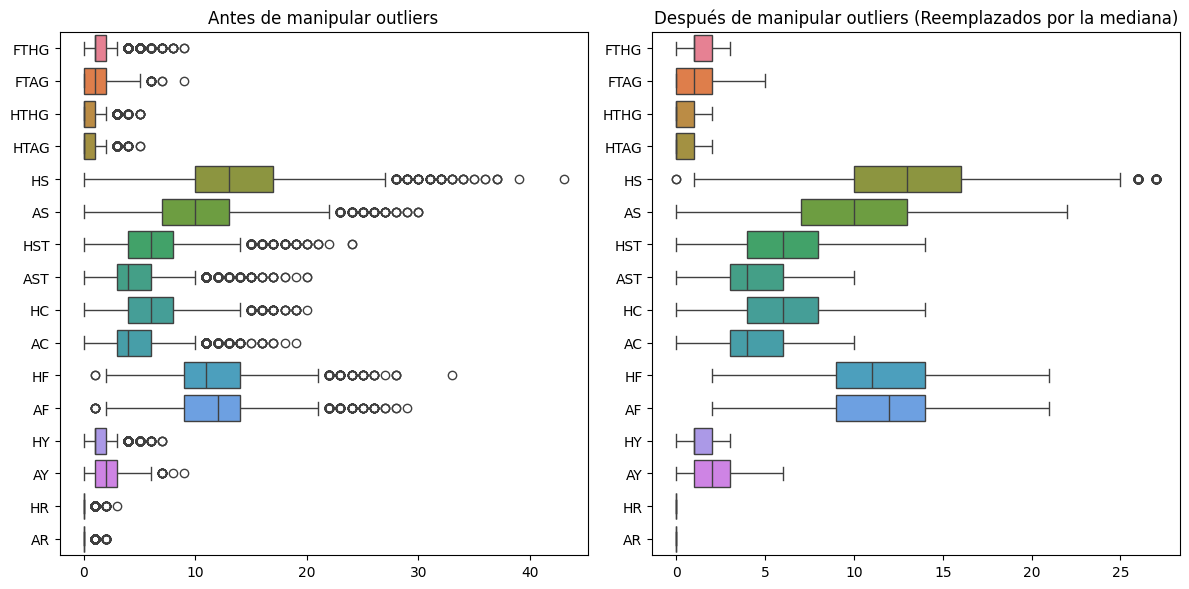

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, orient="h")
plt.title("Antes de manipular outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_replaced, orient="h")
plt.title("Después de manipular outliers (Reemplazados por la mediana)")

plt.tight_layout()
plt.show()


In [14]:
estadisticas_local = df_cleaned.groupby(['Season', 'HomeTeam']).agg(
    partidos_local=('HomeTeam', 'size'),
    victorias_local=('FTR', lambda x: (x == 'H').sum()),
    goles_favor_local=('FTHG', 'sum'),
    goles_contra_local=('FTAG', 'sum'),
    tiros_local=('HS', 'sum'),
    tiros_al_arco_local=('HST', 'sum'),
    faltas_local=('HF', 'sum'),
    corners_local=('HC', 'sum'),
    amarillas_local=('HY', 'sum'),
    rojas_local=('HR', 'sum')
).reset_index().rename(columns={'HomeTeam': 'Equipo', 'Season' : 'Temporada'})

estadisticas_visitante = df_cleaned.groupby(['Season', 'AwayTeam']).agg(
    partidos_visitante=('AwayTeam', 'size'),
    victorias_visitante=('FTR', lambda x: (x == 'A').sum()),
    goles_favor_visitante=('FTAG', 'sum'),
    goles_contra_visitante=('FTHG', 'sum'),
    tiros_visitante=('AS', 'sum'),
    tiros_al_arco_visitante=('AST', 'sum'),
    faltas_visitante=('AF', 'sum'),
    corners_visitante=('AC', 'sum'),
    amarillas_visitante=('AY', 'sum'),
    rojas_visitante=('AR', 'sum')
).reset_index().rename(columns={'AwayTeam': 'Equipo', 'Season' : 'Temporada'})


estadisticas_equipo = pd.merge(estadisticas_local, estadisticas_visitante, on=['Temporada', 'Equipo'], how='outer').fillna(0)


estadisticas_equipo['partidos_totales'] = estadisticas_equipo['partidos_local'] + estadisticas_equipo['partidos_visitante']
estadisticas_equipo['victorias_totales'] = estadisticas_equipo['victorias_local'] + estadisticas_equipo['victorias_visitante']
estadisticas_equipo['porcentaje_victorias'] = estadisticas_equipo['victorias_totales'] / estadisticas_equipo['partidos_totales']
estadisticas_equipo['goles_favor_totales'] = estadisticas_equipo['goles_favor_local'] + estadisticas_equipo['goles_favor_visitante']
estadisticas_equipo['goles_contra_totales'] = estadisticas_equipo['goles_contra_local'] + estadisticas_equipo['goles_contra_visitante']
estadisticas_equipo['diferencia_goles'] = estadisticas_equipo['goles_favor_totales'] - estadisticas_equipo['goles_contra_totales']
estadisticas_equipo['tiros_totales'] = estadisticas_equipo['tiros_local'] + estadisticas_equipo['tiros_visitante']
estadisticas_equipo['tiros_al_arco_totales'] = estadisticas_equipo['tiros_al_arco_local'] + estadisticas_equipo['tiros_al_arco_visitante']
estadisticas_equipo['faltas_totales'] = estadisticas_equipo['faltas_local'] + estadisticas_equipo['faltas_visitante']
estadisticas_equipo['corners_totales'] = estadisticas_equipo['corners_local'] + estadisticas_equipo['corners_visitante']



estadisticas_equipo['goles_descanso_local'] = df_cleaned.groupby(['Season', 'HomeTeam'])['HTHG'].sum().values
estadisticas_equipo['goles_descanso_visitante'] = df_cleaned.groupby(['Season', 'AwayTeam'])['HTAG'].sum().values


estadisticas_equipo = estadisticas_equipo.sort_values(by=['Equipo', 'Temporada'])

estadisticas_equipo['victorias_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['victorias_totales'].shift(1).fillna(0)
estadisticas_equipo['diferencia_goles_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['diferencia_goles'].shift(1).fillna(0)

estadisticas_equipo[['Temporada', 'Equipo', 'partidos_totales', 'victorias_totales', 'porcentaje_victorias', 'goles_favor_totales', 'goles_contra_totales', 'diferencia_goles', 'victorias_temporada_anterior', 'diferencia_goles_temporada_anterior']].head()


,Temporada,Equipo,partidos_totales,victorias_totales,porcentaje_victorias,goles_favor_totales,goles_contra_totales,diferencia_goles,victorias_temporada_anterior,diferencia_goles_temporada_anterior
0,2000-01,Arsenal,38,20,0.526316,63.0,38.0,25.0,0.0,0.0
20,2001-02,Arsenal,17,8,0.470588,35.0,21.0,14.0,20.0,25.0
40,2002-03,Arsenal,38,23,0.605263,85.0,42.0,43.0,8.0,14.0
60,2003-04,Arsenal,38,26,0.684211,73.0,26.0,47.0,23.0,43.0
80,2004-05,Arsenal,38,25,0.657895,87.0,36.0,51.0,26.0,47.0


In [15]:
estadisticas_equipo = estadisticas_equipo.sort_values(by=['Equipo', 'Temporada'])

estadisticas_equipo['victorias_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['victorias_totales'].shift(1).fillna(0)
estadisticas_equipo['diferencia_goles_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['diferencia_goles'].shift(1).fillna(0)
estadisticas_equipo['tiros_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['tiros_totales'].shift(1).fillna(0)
estadisticas_equipo['tiros_al_arco_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['tiros_al_arco_totales'].shift(1).fillna(0)
estadisticas_equipo['corners_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['corners_totales'].shift(1).fillna(0)
estadisticas_equipo['faltas_temporada_anterior'] = estadisticas_equipo.groupby('Equipo')['faltas_totales'].shift(1).fillna(0)

estadisticas_equipo[['Temporada', 'Equipo', 'victorias_totales', 'victorias_temporada_anterior',
                     'diferencia_goles', 'diferencia_goles_temporada_anterior',
                     'tiros_totales', 'tiros_temporada_anterior',
                     'tiros_al_arco_totales', 'tiros_al_arco_temporada_anterior',
                     'corners_totales', 'corners_temporada_anterior',
                     'faltas_totales', 'faltas_temporada_anterior']].head()



,Temporada,Equipo,victorias_totales,victorias_temporada_anterior,diferencia_goles,diferencia_goles_temporada_anterior,tiros_totales,tiros_temporada_anterior,tiros_al_arco_totales,tiros_al_arco_temporada_anterior,corners_totales,corners_temporada_anterior,faltas_totales,faltas_temporada_anterior
0,2000-01,Arsenal,20,0.0,25.0,0.0,540.0,0.0,295.0,0.0,295.0,0.0,495.0,0.0
20,2001-02,Arsenal,8,20.0,14.0,25.0,262.0,540.0,136.0,295.0,120.0,295.0,261.0,495.0
40,2002-03,Arsenal,23,8.0,43.0,14.0,498.0,262.0,296.0,136.0,266.0,120.0,483.0,261.0
60,2003-04,Arsenal,26,23.0,47.0,43.0,471.0,498.0,273.0,296.0,202.0,266.0,499.0,483.0
80,2004-05,Arsenal,25,26.0,51.0,47.0,479.0,471.0,299.0,273.0,203.0,202.0,444.0,499.0


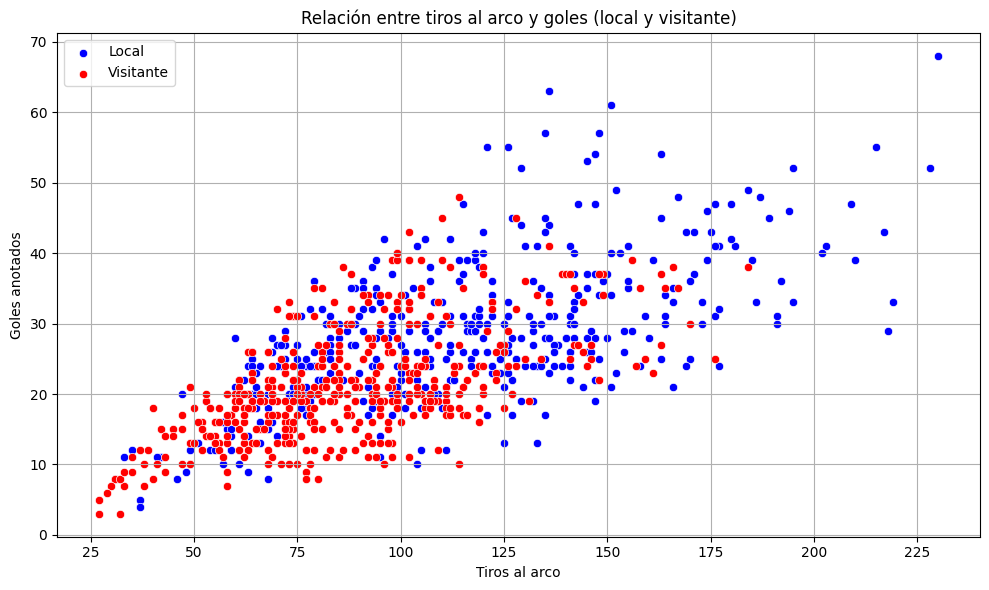

In [16]:
# Relacion entre tiros al arco y goles (Local, Visitante)
plt.figure(figsize=(10,6))

sns.scatterplot(x='tiros_al_arco_local', y='goles_favor_local', data=estadisticas_equipo, label='Local', color='blue')
sns.scatterplot(x='tiros_al_arco_visitante', y='goles_favor_visitante', data=estadisticas_equipo, label='Visitante', color='red')

plt.title('Relación entre tiros al arco y goles (local y visitante)')
plt.xlabel('Tiros al arco')
plt.ylabel('Goles anotados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa una clara correlación entre los tiros a puerta y los goles anotados para ambos equipos, lo que sugiere que cuanto más tiros realiza un equipo, más goles tiende a marcar. Esto es consistente tanto para equipos locales como para visitantes.

In [17]:
features_to_scale = ['partidos_totales', 'victorias_totales', 'porcentaje_victorias',
    'goles_favor_totales', 'goles_contra_totales', 'diferencia_goles',
    'tiros_totales', 'tiros_al_arco_totales', 'corners_totales', 'faltas_totales',
    'victorias_temporada_anterior', 'diferencia_goles_temporada_anterior',
    'tiros_temporada_anterior', 'tiros_al_arco_temporada_anterior',
    'corners_temporada_anterior', 'faltas_temporada_anterior']

scaler = StandardScaler()

estadisticas_equipo[features_to_scale] = scaler.fit_transform(estadisticas_equipo[features_to_scale])

estadisticas_equipo[features_to_scale].head()




,partidos_totales,victorias_totales,porcentaje_victorias,goles_favor_totales,goles_contra_totales,diferencia_goles,tiros_totales,tiros_al_arco_totales,corners_totales,faltas_totales,victorias_temporada_anterior,diferencia_goles_temporada_anterior,tiros_temporada_anterior,tiros_al_arco_temporada_anterior,corners_temporada_anterior,faltas_temporada_anterior
0,0.280277,1.023112,0.967733,0.845045,-0.789581,0.990261,0.936993,1.445551,2.281304,0.948488,-1.805497,-0.077680,-2.435821,-2.127894,-2.519229,-2.664790
20,-4.311488,-0.946994,0.612852,-0.856648,-1.999344,0.554546,-1.803437,-0.982384,-1.894624,-2.261778,1.002628,1.001208,0.803578,1.257208,1.546721,0.732251
40,0.280277,1.515638,1.470482,2.182089,-0.504931,1.703248,0.522971,1.460821,1.589293,0.783859,-0.682247,0.526497,-0.864112,-0.567304,-0.865283,-0.873623
60,0.280277,2.008165,1.973231,1.452792,-1.643531,1.861690,0.256815,1.109611,0.062097,1.003364,1.423847,1.778008,0.551625,1.268683,1.147018,0.649899
80,0.280277,1.843989,1.805648,2.303639,-0.931906,2.020131,0.335676,1.506632,0.085959,0.248814,1.845066,1.950630,0.389655,1.004760,0.264913,0.759702


In [18]:
def estad(df, equipo1, equipo2):

    enfrentamientos_directos = df[((df['HomeTeam'] == equipo1) & (df['AwayTeam'] == equipo2)) |
                                   ((df['HomeTeam'] == equipo2) & (df['AwayTeam'] == equipo1))]
    return enfrentamientos_directos


df_cleaned.loc[:, 'victorias_Local'] = df_cleaned.apply(
    lambda row: estad(df_cleaned, row['HomeTeam'], row['AwayTeam']).FTR.value_counts().get('H', 0), axis=1)


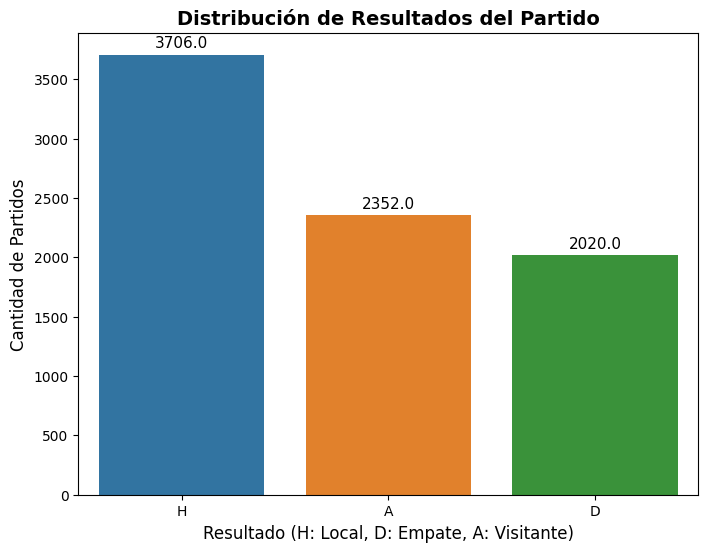

In [19]:
# Distribución de los resultados del partido (Local, Empate, Visitante)
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(8,6))
sns.countplot(x='FTR', data=df, hue='FTR', palette=colores, legend=False)

plt.title('Distribución de Resultados del Partido', fontsize=14, fontweight='bold')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)', fontsize=12)
plt.ylabel('Cantidad de Partidos', fontsize=12)


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')


plt.show()


A partir de este gráfico, la hipótesis de que los equipos locales tienen más probabilidades de ganar que los equipos visitantes está respaldada. El número de victorias locales es considerablemente más alto que el de visitantes, lo que sugiere una ventaja para los equipos que juegan en casa.

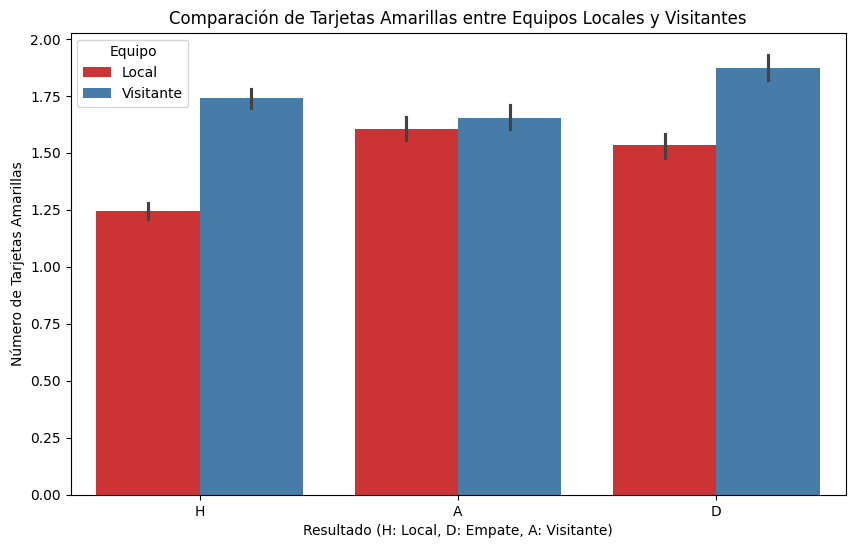

In [20]:
# Comparacion de tarjetas amarillas entre equipos locales y visitantes

df_melted = df.melt(id_vars=['FTR'], value_vars=['HY', 'AY'],
                    var_name='Equipo', value_name='Tarjetas Amarillas')

df_melted['Equipo'] = df_melted['Equipo'].replace({'HY': 'Local', 'AY': 'Visitante'})

plt.figure(figsize=(10,6))
sns.barplot(x='FTR', y='Tarjetas Amarillas', hue='Equipo', data=df_melted, palette='Set1')

plt.title('Comparación de Tarjetas Amarillas entre Equipos Locales y Visitantes')
plt.xlabel('Resultado (H: Local, D: Empate, A: Visitante)')
plt.ylabel('Número de Tarjetas Amarillas')
plt.legend(title='Equipo')
plt.show()

Lo que se observa en este grafico es que tanto en los partidos que gana el equipo local, como en los que hay empate o en los que gana el equipo visitante, siempre el equipo visitante obtiene mas tarjetas amarillas.

In [21]:
df_estadisticas_local = pd.merge(
    df_cleaned,
    estadisticas_equipo,
    left_on=['Season', 'HomeTeam'],
    right_on=['Temporada', 'Equipo'],
    how='left')


df_estadisticas_local = df_estadisticas_local.rename(columns={
    'partidos_totales': 'partidos_locales_totales',
    'victorias_totales': 'victorias_locales_totales',
    'porcentaje_victorias': 'porcentaje_victorias_locales',
    'goles_favor_totales': 'goles_favor_locales',
    'goles_contra_totales': 'goles_contra_locales',
    'diferencia_goles': 'diferencia_goles_locales',
    'tiros_totales': 'tiros_locales_totales',
    'tiros_al_arco_totales': 'tiros_al_arco_locales_totales',
    'corners_totales': 'corners_locales_totales',
    'faltas_totales': 'faltas_locales_totales'
}).drop(columns=['Equipo'])


df_estadisticas = pd.merge(
    df_estadisticas_local,
    estadisticas_equipo,
    left_on=['Season', 'AwayTeam'],
    right_on=['Temporada', 'Equipo'],
    how='left')

df_estadisticas = df_estadisticas.rename(columns={
  'partidos_totales': 'partidos_visitantes_totales',
    'victorias_totales': 'victorias_visitantes_totales',
    'porcentaje_victorias': 'porcentaje_victorias_visitantes',
    'goles_favor_totales': 'goles_favor_visitantes',
    'goles_contra_totales': 'goles_contra_visitantes',
    'diferencia_goles': 'diferencia_goles_visitantes',
    'tiros_totales': 'tiros_visitantes_totales',
    'tiros_al_arco_totales': 'tiros_al_arco_visitantes_totales',
    'corners_totales': 'corners_visitantes_totales',
    'faltas_totales': 'faltas_visitantes_totales'
}).drop(columns=['Equipo'])


df_estadisticas = df_estadisticas.rename(columns={
    'Season': 'Temporada',
    'HomeTeam': 'Equipo_Local',
    'AwayTeam': 'Equipo_Visitante'})


df_estadisticas[['Temporada', 'Equipo_Local', 'Equipo_Visitante',
                    'partidos_locales_totales', 'victorias_locales_totales', 'porcentaje_victorias_locales', 'diferencia_goles_locales',
                    'tiros_locales_totales', 'tiros_al_arco_locales_totales', 'corners_locales_totales', 'faltas_locales_totales',
                    'partidos_visitantes_totales', 'victorias_visitantes_totales', 'porcentaje_victorias_visitantes', 'diferencia_goles_visitantes',
                    'tiros_visitantes_totales', 'tiros_al_arco_visitantes_totales', 'corners_visitantes_totales', 'faltas_visitantes_totales']].head()




,Temporada,Equipo_Local,Equipo_Visitante,partidos_locales_totales,victorias_locales_totales,porcentaje_victorias_locales,diferencia_goles_locales,tiros_locales_totales,tiros_al_arco_locales_totales,corners_locales_totales,faltas_locales_totales,partidos_visitantes_totales,victorias_visitantes_totales,porcentaje_victorias_visitantes,diferencia_goles_visitantes,tiros_visitantes_totales,tiros_al_arco_visitantes_totales,corners_visitantes_totales,faltas_visitantes_totales
0,2000-01,Charlton,Man City,0.280277,0.038059,-0.037764,-0.277273,-0.709237,0.254489,0.324583,0.564353,0.280277,-0.946994,-1.043262,-0.950650,-0.669806,-0.402122,0.491621,2.238081
1,2000-01,Chelsea,West Ham,0.280277,0.530585,0.464984,0.911040,0.582117,0.605700,0.300721,1.634442,0.280277,-0.618643,-0.708096,-0.198052,0.296245,0.437729,0.324583,0.646668
2,2000-01,Coventry,Middlesbrough,0.280277,-0.946994,-1.043262,-1.069481,-0.551514,-0.356312,0.157546,1.414936,0.280277,-0.782819,-0.875679,0.000000,-0.916247,-0.509013,-1.274200,0.989645
3,2000-01,Derby,Southampton,0.280277,-0.618643,-0.708096,-0.871429,-1.379558,-0.906033,-0.963988,1.414936,0.280277,0.038059,-0.037764,-0.316883,-0.305072,-0.402122,0.276859,1.140555
4,2000-01,Leeds,Everton,0.280277,1.023112,0.967733,0.831819,0.296245,0.422459,1.684743,2.238081,0.280277,-0.454468,-0.540513,-0.554546,-0.502226,-0.081452,0.085959,1.812790


In [23]:
df_estadisticas['target'] = df_estadisticas['FTR'].map({'H': 1, 'D': 0, 'A': -1})


df_estadisticas[['Temporada', 'Equipo_Local', 'Equipo_Visitante',
                    'partidos_locales_totales', 'victorias_locales_totales', 'porcentaje_victorias_locales', 'diferencia_goles_locales',
                    'tiros_locales_totales', 'tiros_al_arco_locales_totales', 'corners_locales_totales', 'faltas_locales_totales',
                    'partidos_visitantes_totales', 'victorias_visitantes_totales', 'porcentaje_victorias_visitantes', 'diferencia_goles_visitantes',
                    'tiros_visitantes_totales', 'tiros_al_arco_visitantes_totales', 'corners_visitantes_totales', 'faltas_visitantes_totales',
                           'target']].head()

,Temporada,Equipo_Local,Equipo_Visitante,partidos_locales_totales,victorias_locales_totales,porcentaje_victorias_locales,diferencia_goles_locales,tiros_locales_totales,tiros_al_arco_locales_totales,corners_locales_totales,faltas_locales_totales,partidos_visitantes_totales,victorias_visitantes_totales,porcentaje_victorias_visitantes,diferencia_goles_visitantes,tiros_visitantes_totales,tiros_al_arco_visitantes_totales,corners_visitantes_totales,faltas_visitantes_totales,target
0,2000-01,Charlton,Man City,0.280277,0.038059,-0.037764,-0.277273,-0.709237,0.254489,0.324583,0.564353,0.280277,-0.946994,-1.043262,-0.950650,-0.669806,-0.402122,0.491621,2.238081,1
1,2000-01,Chelsea,West Ham,0.280277,0.530585,0.464984,0.911040,0.582117,0.605700,0.300721,1.634442,0.280277,-0.618643,-0.708096,-0.198052,0.296245,0.437729,0.324583,0.646668,1
2,2000-01,Coventry,Middlesbrough,0.280277,-0.946994,-1.043262,-1.069481,-0.551514,-0.356312,0.157546,1.414936,0.280277,-0.782819,-0.875679,0.000000,-0.916247,-0.509013,-1.274200,0.989645,-1
3,2000-01,Derby,Southampton,0.280277,-0.618643,-0.708096,-0.871429,-1.379558,-0.906033,-0.963988,1.414936,0.280277,0.038059,-0.037764,-0.316883,-0.305072,-0.402122,0.276859,1.140555,0
4,2000-01,Leeds,Everton,0.280277,1.023112,0.967733,0.831819,0.296245,0.422459,1.684743,2.238081,0.280277,-0.454468,-0.540513,-0.554546,-0.502226,-0.081452,0.085959,1.812790,1


In [24]:
from sklearn.model_selection import train_test_split

features = ['porcentaje_victorias_locales', 'diferencia_goles_locales',
                    'tiros_locales_totales', 'tiros_al_arco_locales_totales', 'corners_locales_totales', 'faltas_locales_totales', 'porcentaje_victorias_visitantes', 'diferencia_goles_visitantes',
                    'tiros_visitantes_totales', 'tiros_al_arco_visitantes_totales', 'corners_visitantes_totales', 'faltas_visitantes_totales']

X = df_estadisticas[features]
y = df_estadisticas['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (5654, 12) (5654,)
Dimensiones del conjunto de prueba: (2424, 12) (2424,)


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train)


y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluación
print("Evaluación de la Regresión Logística:")
print("Precisión:", accuracy_score(y_test, y_pred_logistic))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_logistic))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_logistic))


Evaluación de la Regresión Logística:
Precisión: 0.570957095709571
Matriz de Confusión:
 [[401  56 274]
 [150  74 328]
 [161  71 909]]
Reporte de Clasificación:
               precision    recall  f1-score   support

          -1       0.56      0.55      0.56       731
           0       0.37      0.13      0.20       552
           1       0.60      0.80      0.69      1141

    accuracy                           0.57      2424
   macro avg       0.51      0.49      0.48      2424
weighted avg       0.54      0.57      0.54      2424



Conclusión

Precisión del Modelo: La precisión del modelo es 57.1%, significa que acierta un poco más de la mitad de las veces, pero tambien indica que el modelo necesita mejoras.

El modelo predice mejor para los casos que el equipo local gana (1), con una precisión del 60% y un recall del 80%, en general acierta cuando el equipo local gana.

Para los empates le cueta mas la prediccion (0), con una precisión del 37% y un recall del 13%, lo que sugiere que el modelo tiene dificultades para identificar correctamente estos resultados.

Para los casos en que el equipo visitante gana (-1), el modelo tiene una precisión moderada del 56%, se puede mejorar.


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Evaluación del Random Forest:")
print("Precisión:", accuracy_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))


Evaluación del Random Forest:
Precisión: 0.5152640264026402
Matriz de Confusión:
 [[350 135 246]
 [145 110 297]
 [183 169 789]]
Reporte de Clasificación:
               precision    recall  f1-score   support

          -1       0.52      0.48      0.50       731
           0       0.27      0.20      0.23       552
           1       0.59      0.69      0.64      1141

    accuracy                           0.52      2424
   macro avg       0.46      0.46      0.45      2424
weighted avg       0.50      0.52      0.50      2424



La precisión del modelo de Random Forest es 51.5%, es inferior a la del modelo de regresión logística (57.1%). Si bien acierta mas de lo que se equivoca, indica que el modelo necesita ser mas robusto para ser confiable.
